<a href="https://colab.research.google.com/github/Augusta02/Fraud-Classification-Model/blob/main/indicina_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

Indicina is a fintech solution organisation that empowers businesses offer credits to customers securely. Therefore the need for the organisation to recognise credit worthy and customers transactions behaviour is important so as not to run into a risk. This project is aimed to recognise customers financial behaviours and  fraudulent credit card transactions so as customers are not falsely charged for items they didn't purchase. Therefore, Indicina need to have an efficient model that identifies such transactions or activities.

The given dataset contains the transactions between people, the information that they are fraud or not, and my aim is to differentiate between them.  The ultimate intent is to tackle this situation by building classification models to classify and distinguish fraud transactions.

Why Classification? Classification is the process of predicting discrete variables (binary, Yes/no, etc.). Given the case, it will be more suitable to deploy a classification model rather than any others.

## Data

The dataset contains credit card transactions made by customers in 2 years, from January 2019 to December 2020. It was collected from Kaggle and three more columns were added.


## Work Flow

- Load Data
- EDA [Handle Missing Values ]
- Show Histogram of Balance Column
- Provide Hypotheses of Histogram
- Visualize Mean distribution of Customers Activation Date by Year & Month
- Report on Customers Percentage Credit limit by Cash_advance in the year 2020
- Relationship between features in the dataset
- Feature Selection and Scaling
- Class Balance Check in the Target variable, Fraud.
- Balance Training Set
- Cross Validation
- Model Selection based on ROC-AUC and Precision-Recall Metric
- Fine Tune Selected Model
- Predict On Test Data
- Provide Insights based of prediction results
- Visualize Feature Importance

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/archive/Indicina_DS_Challenge_2023 (2) (1).csv')

df.head()


Unnamed: 0 cust_id activated_date last_payment_date      balance  \
0           1  C10001      10/6/2019          9/9/2020    40.900749   
1           2  C10002      10/6/2019          7/4/2020  3202.467416   
2           3  C10003      10/6/2019         9/17/2020  2495.148862   
3           4  C10004      10/6/2019         8/24/2020  1666.670542   
4           5  C10005      10/6/2019        10/20/2020   817.714335   

   balance_frequency  purchases  oneoff_purchases  installments_purchases  \
0           0.818182      95.40              0.00                    95.4   
1           0.909091       0.00              0.00                     0.0   
2           1.000000     773.17            773.17                     0.0   
3           0.636364    1499.00           1499.00                     0.0   
4           1.000000      16.00             16.00                     0.0   

   cash_advance  ...  purchases_installments_frequency  \
0      0.000000  ...                          0.083333   
1   6442.945483  ...                          0.000000   
2      0.000000  ...                          0.000000   
3    205.788017  ...                          0.000000   
4      0.000000  ...                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  fraud  
0   201.802084        139.509787          0.000000      12      0  
1  4103.032597       1072.340217          0.222222      12      0  
2   622.066742        627.284787          0.000000      12      0  
3     0.000000               NaN          0.000000      12      0  
4   678.334763        244.791237          0.000000      12      0  

[5 rows x 22 columns]

In [ ]:
# get shape of the dataset

df.shape

(8950, 22)

In [ ]:
# get information of the columns in the dataset
# the data type and number of missing values in each column compared
#  to the shape of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   cust_id                           8950 non-null   object 
 2   activated_date                    8937 non-null   object 
 3   last_payment_date                 8941 non-null   object 
 4   balance                           8948 non-null   float64
 5   balance_frequency                 8950 non-null   float64
 6   purchases                         8950 non-null   float64
 7   oneoff_purchases                  8950 non-null   float64
 8   installments_purchases            8950 non-null   float64
 9   cash_advance                      8838 non-null   float64
 10  purchases_frequency               8950 non-null   float64
 11  oneoff_purchases_frequency        8950 non-null   float64
 12  purcha

In [ ]:
# drop Unnamed column since it is similar to index
df.drop(columns= 'Unnamed: 0', inplace=True)

In [ ]:
df.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   8948.000000        8950.000000   8950.000000       8950.000000   
mean    1564.612804           0.877271   1003.204834        592.437371   
std     2081.735635           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.234272           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.525476           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             8950.000000   8838.000000          8950.000000   
mean               411.067645    978.980630             0.490351   
std                904.338115   2099.762588             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1115.395002             0.916667   
max              22500.000000  47137.211760             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure  \
count   8950.000000       8629.000000       8950.000000  8950.000000   
mean    1733.143852        864.173246          0.153715    11.517318   
std     2895.063757       2373.455761          0.292499     1.338331   
min        0.000000          0.019163          0.000000     6.000000   
25%      383.276166        169.079690          0.000000    12.000000   
50%      856.901546        311.963409          0.000000    12.000000   
75%     1901.134317        825.271126          0.142857    12.000000   
max    50721.483360      76406.207520          1.000000    12.000000   

             fraud  
count  8950.000000  
mean      0.007821  
std       0.088096  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [ ]:
# check for missing values in columns
df.isnull().sum()

cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64

In [ ]:
# drop missing values if less than 10%
# using 10% because this is a common practice and
# also keeps data integrity and we still have sufficient sample size of the dataset


# calculate percentage of missing values in each column
missing_values = df.isnull().sum()
total_len = len(df)
percentage_missing_value = (missing_values / total_len) * 100

# dataframe to display result
missing_data = pd.DataFrame({
    'Column Name': missing_values.index,
    'Missing Values' : missing_values.values,
    'Percentage': percentage_missing_value.values
})

print(missing_data)

                         Column Name  Missing Values  Percentage
0                            cust_id               0    0.000000
1                     activated_date              13    0.145251
2                  last_payment_date               9    0.100559
3                            balance               2    0.022346
4                  balance_frequency               0    0.000000
5                          purchases               0    0.000000
6                   oneoff_purchases               0    0.000000
7             installments_purchases               0    0.000000
8                       cash_advance             112    1.251397
9                purchases_frequency               0    0.000000
10        oneoff_purchases_frequency               0    0.000000
11  purchases_installments_frequency               0    0.000000
12            cash_advance_frequency               0    0.000000
13                  cash_advance_trx               0    0.000000
14                     pu

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

cust_id                             0
activated_date                      0
last_payment_date                   0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
fraud                               0
dtype: int64

## Part 1

## Plot an histogram of the balance amount for all the customers.

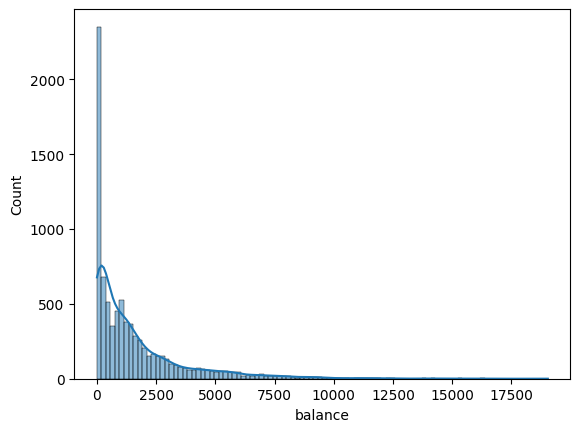

In [ ]:
sns.histplot(df['balance'], kde=True)
plt.show()

In [ ]:
import scipy.stats as stats
skewness = stats.skew(df['balance'])
kurtosis = stats.kurtosis(df['balance'])

# test for mormality
ks_statistic, pvalue = stats.kstest(df['balance'], 'norm')

print(skewness)
print(kurtosis)
print(ks_statistic, pvalue)

2.375534894422722
7.5604971769492995
0.9865457333698321 0.0


# Report any structure you find and any hypotheses you have about that structure.

From the histogram of the balance column, we see that the distribution is postively skewed, such that the Mean is greater than the median of the distribution. Majority of the data points in this column cluster to the left hand side.

The value of the skewness also proves that the feature is postively skewed, as its skewness result is more than 0.5 and 1, and since its Skewness > +1, we can conclude that this is extremely Postively Skewed distribution.


Also, the value of the Kurtosis which is positively greater than 3, indicates that it is a Leptokurtic Kurtosis, which means it is not a normally distributed feature and there are more chances of outliers in this feature.

Lastly based of the Kolmogorov- Smirnov normality test, the p-value which is less than 0.5 indicates that the feature is significantly deviates from the normal distribution

## Report mean and median balance, grouped by year and month of activated_date .

In [ ]:
df.head()

cust_id activated_date last_payment_date      balance  balance_frequency  \
0  C10001      10/6/2019          9/9/2020    40.900749           0.818182   
1  C10002      10/6/2019          7/4/2020  3202.467416           0.909091   
2  C10003      10/6/2019         9/17/2020  2495.148862           1.000000   
4  C10005      10/6/2019        10/20/2020   817.714335           1.000000   
5  C10006      10/6/2019         7/27/2020  1809.828751           1.000000   

   purchases  oneoff_purchases  installments_purchases  cash_advance  \
0      95.40              0.00                   95.40      0.000000   
1       0.00              0.00                    0.00   6442.945483   
2     773.17            773.17                    0.00      0.000000   
4      16.00             16.00                    0.00      0.000000   
5    1333.28              0.00                 1333.28      0.000000   

   purchases_frequency  ...  purchases_installments_frequency  \
0             0.166667  ...                          0.083333   
1             0.000000  ...                          0.000000   
2             1.000000  ...                          0.000000   
4             0.083333  ...                          0.000000   
5             0.666667  ...                          0.583333   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      payments  minimum_payments  prc_full_payment  tenure  fraud  
0   201.802084        139.509787          0.000000      12      0  
1  4103.032597       1072.340217          0.222222      12      0  
2   622.066742        627.284787          0.000000      12      0  
4   678.334763        244.791237          0.000000      12      0  
5  1400.057770       2407.246035          0.000000      12      0  

[5 rows x 21 columns]

In [ ]:
df['activated_date'].dtype

dtype('O')

In [ ]:
# change activated_date column to date column
df['activated_date'] = pd.to_datetime(df['activated_date'], errors='coerce')
df['activated_date'].dtype

dtype('<M8[ns]')

In [ ]:
# extract month from activated_date column
df['month'] = df['activated_date'].dt.month
df.head()

cust_id activated_date last_payment_date      balance  balance_frequency  \
0  C10001     2019-10-06          9/9/2020    40.900749           0.818182   
1  C10002     2019-10-06          7/4/2020  3202.467416           0.909091   
2  C10003     2019-10-06         9/17/2020  2495.148862           1.000000   
4  C10005     2019-10-06        10/20/2020   817.714335           1.000000   
5  C10006     2019-10-06         7/27/2020  1809.828751           1.000000   

   purchases  oneoff_purchases  installments_purchases  cash_advance  \
0      95.40              0.00                   95.40      0.000000   
1       0.00              0.00                    0.00   6442.945483   
2     773.17            773.17                    0.00      0.000000   
4      16.00             16.00                    0.00      0.000000   
5    1333.28              0.00                 1333.28      0.000000   

   purchases_frequency  ...  cash_advance_frequency  cash_advance_trx  \
0             0.166667  ...                    0.00                 0   
1             0.000000  ...                    0.25                 4   
2             1.000000  ...                    0.00                 0   
4             0.083333  ...                    0.00                 0   
5             0.666667  ...                    0.00                 0   

   purchases_trx  credit_limit     payments  minimum_payments  \
0              2        1000.0   201.802084        139.509787   
1              0        7000.0  4103.032597       1072.340217   
2             12        7500.0   622.066742        627.284787   
4              1        1200.0   678.334763        244.791237   
5              8        1800.0  1400.057770       2407.246035   

   prc_full_payment  tenure  fraud  month  
0          0.000000      12      0     10  
1          0.222222      12      0     10  
2          0.000000      12      0     10  
4          0.000000      12      0     10  
5          0.000000      12      0     10  

[5 rows x 22 columns]

In [ ]:
# extract year from activated_date column
df['year'] = df['activated_date'].dt.year
df.head()

cust_id activated_date last_payment_date      balance  balance_frequency  \
0  C10001     2019-10-06          9/9/2020    40.900749           0.818182   
1  C10002     2019-10-06          7/4/2020  3202.467416           0.909091   
2  C10003     2019-10-06         9/17/2020  2495.148862           1.000000   
4  C10005     2019-10-06        10/20/2020   817.714335           1.000000   
5  C10006     2019-10-06         7/27/2020  1809.828751           1.000000   

   purchases  oneoff_purchases  installments_purchases  cash_advance  \
0      95.40              0.00                   95.40      0.000000   
1       0.00              0.00                    0.00   6442.945483   
2     773.17            773.17                    0.00      0.000000   
4      16.00             16.00                    0.00      0.000000   
5    1333.28              0.00                 1333.28      0.000000   

   purchases_frequency  ...  cash_advance_trx  purchases_trx  credit_limit  \
0             0.166667  ...                 0              2        1000.0   
1             0.000000  ...                 4              0        7000.0   
2             1.000000  ...                 0             12        7500.0   
4             0.083333  ...                 0              1        1200.0   
5             0.666667  ...                 0              8        1800.0   

      payments  minimum_payments  prc_full_payment  tenure  fraud  month  year  
0   201.802084        139.509787          0.000000      12      0     10  2019  
1  4103.032597       1072.340217          0.222222      12      0     10  2019  
2   622.066742        627.284787          0.000000      12      0     10  2019  
4   678.334763        244.791237          0.000000      12      0     10  2019  
5  1400.057770       2407.246035          0.000000      12      0     10  2019  

[5 rows x 23 columns]

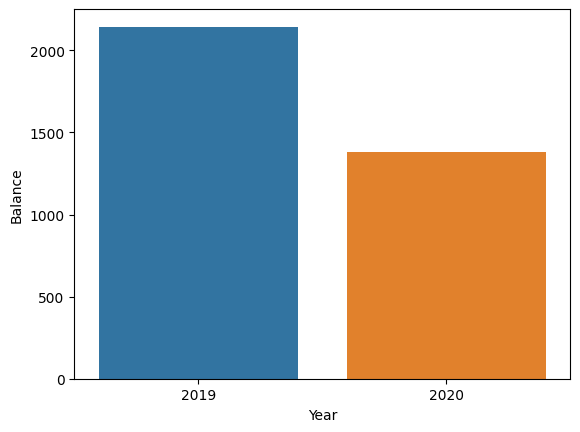

In [ ]:
# show mean balance column by the year
group_balance_by_year = df.groupby('year')['balance'].mean().reset_index()
sns.barplot(data=group_balance_by_year, x='year', y='balance')
plt.xlabel('Year')
plt.ylabel('Balance')
plt.show()

In the barplot, the bar representing 2019 is higher than the bar for 2020. This indicates that users who activated their accounts in 2019 maintained a higher average balance in their accounts compared to the other year.



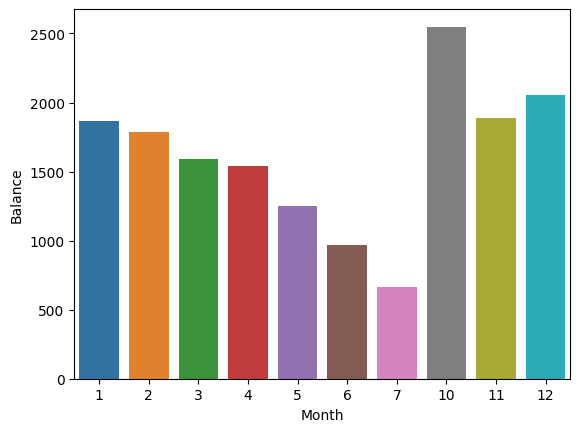

In [ ]:
# group mean balance column by the month
group_balance_by_month = df.groupby('month')['balance'].mean().reset_index()
sns.barplot(data=group_balance_by_month, x='month', y='balance')
plt.xlabel('Month')
plt.ylabel('Balance')
plt.show()


In the barplot, the bar representing October is notably higher than the bars for other months, confirming the higher mean balance in October. This indicates that users who activated their accounts in October tend to maintain a higher average balance in their accounts compared to other activation months. Also, we can see that the months of August and September do not have any representation, this could mean that we do not have customers who activate their accounts in these months. We might what to understand the reason why this happens.

### Report in a table the following information for customers who activated their account and made their last payment during 2020: cust_id (excluding letters), activated_date (in format YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance , credit_limit , and a calculated field of
### cash_advance as a percentage of credit_limit .

In [ ]:
# create year_month column from activated_date
df['activated_year_month'] = df['activated_date'].dt.to_period('M')
df.head()

cust_id activated_date last_payment_date      balance  balance_frequency  \
0  C10001     2019-10-06          9/9/2020    40.900749           0.818182   
1  C10002     2019-10-06          7/4/2020  3202.467416           0.909091   
2  C10003     2019-10-06         9/17/2020  2495.148862           1.000000   
4  C10005     2019-10-06        10/20/2020   817.714335           1.000000   
5  C10006     2019-10-06         7/27/2020  1809.828751           1.000000   

   purchases  oneoff_purchases  installments_purchases  cash_advance  \
0      95.40              0.00                   95.40      0.000000   
1       0.00              0.00                    0.00   6442.945483   
2     773.17            773.17                    0.00      0.000000   
4      16.00             16.00                    0.00      0.000000   
5    1333.28              0.00                 1333.28      0.000000   

   purchases_frequency  ...  purchases_trx  credit_limit     payments  \
0             0.166667  ...              2        1000.0   201.802084   
1             0.000000  ...              0        7000.0  4103.032597   
2             1.000000  ...             12        7500.0   622.066742   
4             0.083333  ...              1        1200.0   678.334763   
5             0.666667  ...              8        1800.0  1400.057770   

   minimum_payments  prc_full_payment  tenure  fraud  month  year  \
0        139.509787          0.000000      12      0     10  2019   
1       1072.340217          0.222222      12      0     10  2019   
2        627.284787          0.000000      12      0     10  2019   
4        244.791237          0.000000      12      0     10  2019   
5       2407.246035          0.000000      12      0     10  2019   

   activated_year_month  
0               2019-10  
1               2019-10  
2               2019-10  
4               2019-10  
5               2019-10  

[5 rows x 24 columns]

In [ ]:
df['activated_year_month'].dtype

period[M]

In [ ]:
# change last_payment_date column to datetime
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], errors='coerce')
df['last_payment_date'].dtype

dtype('<M8[ns]')

In [ ]:
# create a new dataframe with filtered_condition
# where activation_year and last_payment_date is 2020

filter_condition = (df['activated_year_month'].dt.year == 2020) & (df['last_payment_date'].dt.year == 2020)
filtered_df = df[filter_condition]

filtered_df.head()

cust_id activated_date last_payment_date      balance  balance_frequency  \
2633  C12709     2020-01-01        2020-05-08  2917.656276                1.0   
2634  C12710     2020-01-01        2020-05-26   542.807485                1.0   
2635  C12712     2020-01-01        2020-10-20  2362.643772                1.0   
2636  C12713     2020-01-01        2020-08-22  4164.796859                1.0   
2637  C12714     2020-01-01        2020-04-26  1304.460033                1.0   

      purchases  oneoff_purchases  installments_purchases  cash_advance  \
2633     141.81            141.81                    0.00   2431.292076   
2634     220.62            220.62                    0.00      0.000000   
2635    2826.99           1496.59                 1330.40      0.000000   
2636     784.63            617.54                  167.09      0.000000   
2637       0.00              0.00                    0.00     78.763096   

      purchases_frequency  ...  purchases_trx  credit_limit     payments  \
2633             0.166667  ...              2        8000.0   993.289914   
2634             0.166667  ...              3        2000.0   608.782428   
2635             1.000000  ...             97        3000.0  1748.687628   
2636             0.454545  ...             16        9000.0  1072.433416   
2637             0.000000  ...              0        1500.0   395.136073   

      minimum_payments  prc_full_payment  tenure  fraud  month  year  \
2633       1013.060637               0.0      12      0      1  2020   
2634        166.733071               0.0      12      0      1  2020   
2635        984.331832               0.0      12      0      1  2020   
2636       1311.061985               0.0      11      0      1  2020   
2637        368.588193               0.0      12      0      1  2020   

      activated_year_month  
2633               2020-01  
2634               2020-01  
2635               2020-01  
2636               2020-01  
2637               2020-01  

[5 rows x 24 columns]

In [ ]:
# remove letters from cust_id values
filtered_df['cust_id'].unique()

array(['C12709', 'C12710', 'C12712', ..., 'C19188', 'C19189', 'C19190'],
      dtype=object)

In [ ]:
import re
# pattern to match
# the pattern matches strings that start with a letter
#  and return the remaining string
pattern= r'^[a-zA-Z](.*)'

def clean_customer(x):
  match_value = re.match(pattern, x)
  if match_value:
    return match_value.group(1)
  else:
    return x

filtered_df['cust_id'] = filtered_df['cust_id'].apply(clean_customer)

filtered_df.head()

<ipython-input-26-fee5250a47ba>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cust_id'] = filtered_df['cust_id'].apply(clean_customer)


cust_id activated_date last_payment_date      balance  balance_frequency  \
2633   12709     2020-01-01        2020-05-08  2917.656276                1.0   
2634   12710     2020-01-01        2020-05-26   542.807485                1.0   
2635   12712     2020-01-01        2020-10-20  2362.643772                1.0   
2636   12713     2020-01-01        2020-08-22  4164.796859                1.0   
2637   12714     2020-01-01        2020-04-26  1304.460033                1.0   

      purchases  oneoff_purchases  installments_purchases  cash_advance  \
2633     141.81            141.81                    0.00   2431.292076   
2634     220.62            220.62                    0.00      0.000000   
2635    2826.99           1496.59                 1330.40      0.000000   
2636     784.63            617.54                  167.09      0.000000   
2637       0.00              0.00                    0.00     78.763096   

      purchases_frequency  ...  purchases_trx  credit_limit     payments  \
2633             0.166667  ...              2        8000.0   993.289914   
2634             0.166667  ...              3        2000.0   608.782428   
2635             1.000000  ...             97        3000.0  1748.687628   
2636             0.454545  ...             16        9000.0  1072.433416   
2637             0.000000  ...              0        1500.0   395.136073   

      minimum_payments  prc_full_payment  tenure  fraud  month  year  \
2633       1013.060637               0.0      12      0      1  2020   
2634        166.733071               0.0      12      0      1  2020   
2635        984.331832               0.0      12      0      1  2020   
2636       1311.061985               0.0      11      0      1  2020   
2637        368.588193               0.0      12      0      1  2020   

      activated_year_month  
2633               2020-01  
2634               2020-01  
2635               2020-01  
2636               2020-01  
2637               2020-01  

[5 rows x 24 columns]

In [ ]:
# create a column containing percentage of cash_advance and credit_limit
# for users in the filtered_df

for index, row in filtered_df.iterrows():
  percentage_value = (row['cash_advance'] / row['credit_limit']) * 100
  filtered_df.loc[index, 'percentage_credit_limit_by_cash_advance'] = percentage_value

<ipython-input-27-35f63a287d80>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[index, 'percentage_credit_limit_by_cash_advance'] = percentage_value


In [ ]:
customers = filtered_df[['cust_id', 'activated_year_month', 'last_payment_date', 'cash_advance', 'credit_limit', 'percentage_credit_limit_by_cash_advance']]

customers.head(50)

cust_id activated_year_month last_payment_date  cash_advance  \
2633   12709              2020-01        2020-05-08   2431.292076   
2634   12710              2020-01        2020-05-26      0.000000   
2635   12712              2020-01        2020-10-20      0.000000   
2636   12713              2020-01        2020-08-22      0.000000   
2637   12714              2020-01        2020-04-26     78.763096   
2638   12715              2020-01        2020-10-16      0.000000   
2639   12716              2020-01        2020-05-06   2260.735690   
2640   12717              2020-01        2020-08-13    611.974158   
2641   12718              2020-01        2020-08-28      0.000000   
2642   12719              2020-01        2020-07-15   4200.991254   
2643   12720              2020-01        2020-05-06   2144.180453   
2644   12721              2020-01        2020-08-27      0.000000   
2645   12722              2020-01        2020-10-27   6171.934509   
2646   12723              2020-01        2020-08-09      0.000000   
2647   12724              2020-01        2020-05-16      0.000000   
2648   12725              2020-01        2020-05-24    689.185829   
2649   12726              2020-01        2020-10-09   3325.302419   
2650   12727              2020-01        2020-08-25    437.399211   
2651   12728              2020-01        2020-07-24    456.396077   
2652   12729              2020-01        2020-05-31   1846.252071   
2653   12730              2020-01        2020-08-19      0.000000   
2654   12731              2020-01        2020-11-03      0.000000   
2655   12732              2020-01        2020-10-09      0.000000   
2656   12733              2020-01        2020-05-30      0.000000   
2657   12734              2020-01        2020-05-09   3860.699586   
2658   12735              2020-01        2020-10-29      0.000000   
2659   12736              2020-01        2020-09-21      0.000000   
2660   12737              2020-01        2020-09-03   2909.753084   
2661   12738              2020-01        2020-05-24   2119.702403   
2662   12739              2020-01        2020-09-14      0.000000   
2663   12740              2020-01        2020-05-27      0.000000   
2664   12741              2020-01        2020-08-01    315.120089   
2665   12742              2020-01        2020-08-11      0.000000   
2666   12743              2020-01        2020-05-09      0.000000   
2667   12744              2020-01        2020-08-12   1321.906162   
2668   12745              2020-01        2020-07-29      0.000000   
2669   12746              2020-01        2020-06-04   3603.787202   
2670   12747              2020-01        2020-07-14   1906.435220   
2671   12748              2020-01        2020-05-09      0.000000   
2672   12749              2020-01        2020-11-07      0.000000   
2673   12750              2020-01        2020-07-03   2404.829712   
2674   12751              2020-01        2020-08-31    737.622804   
2675   12752              2020-01        2020-07-01      0.000000   
2676   12753              2020-01        2020-07-22   2676.476175   
2677   12754              2020-01        2020-11-07   4212.521736   
2678   12755              2020-01        2020-08-07   7894.578816   
2679   12756              2020-01        2020-09-03      0.000000   
2680   12757              2020-01        2020-11-05   6394.923585   
2681   12758              2020-01        2020-10-11   8223.638112   
2682   12759              2020-01        2020-05-03   9798.167329   

      credit_limit  percentage_credit_limit_by_cash_advance  
2633   8000.000000                                30.391151  
2634   2000.000000                                 0.000000  
2635   3000.000000                                 0.000000  
2636   9000.000000                                 0.000000  
2637   1500.000000                                 5.250873  
2638   4000.000000                                 0.000000  
2639   9000.000000                                2

# Part 3

# Build a predictive model for fraud.

In [ ]:
df.head()

cust_id activated_date last_payment_date      balance  balance_frequency  \
0  C10001     2019-10-06        2020-09-09    40.900749           0.818182   
1  C10002     2019-10-06        2020-07-04  3202.467416           0.909091   
2  C10003     2019-10-06        2020-09-17  2495.148862           1.000000   
4  C10005     2019-10-06        2020-10-20   817.714335           1.000000   
5  C10006     2019-10-06        2020-07-27  1809.828751           1.000000   

   purchases  oneoff_purchases  installments_purchases  cash_advance  \
0      95.40              0.00                   95.40      0.000000   
1       0.00              0.00                    0.00   6442.945483   
2     773.17            773.17                    0.00      0.000000   
4      16.00             16.00                    0.00      0.000000   
5    1333.28              0.00                 1333.28      0.000000   

   purchases_frequency  ...  purchases_trx  credit_limit     payments  \
0             0.166667  ...              2        1000.0   201.802084   
1             0.000000  ...              0        7000.0  4103.032597   
2             1.000000  ...             12        7500.0   622.066742   
4             0.083333  ...              1        1200.0   678.334763   
5             0.666667  ...              8        1800.0  1400.057770   

   minimum_payments  prc_full_payment  tenure  fraud  month  year  \
0        139.509787          0.000000      12      0     10  2019   
1       1072.340217          0.222222      12      0     10  2019   
2        627.284787          0.000000      12      0     10  2019   
4        244.791237          0.000000      12      0     10  2019   
5       2407.246035          0.000000      12      0     10  2019   

   activated_year_month  
0               2019-10  
1               2019-10  
2               2019-10  
4               2019-10  
5               2019-10  

[5 rows x 24 columns]

In [ ]:
# drop columns that were previously created to answer Part 2 Questions
df.drop(columns=['month', 'year', 'activated_year_month'], inplace=True)

In [ ]:
df.head()

cust_id activated_date last_payment_date      balance  balance_frequency  \
0  C10001     2019-10-06        2020-09-09    40.900749           0.818182   
1  C10002     2019-10-06        2020-07-04  3202.467416           0.909091   
2  C10003     2019-10-06        2020-09-17  2495.148862           1.000000   
4  C10005     2019-10-06        2020-10-20   817.714335           1.000000   
5  C10006     2019-10-06        2020-07-27  1809.828751           1.000000   

   purchases  oneoff_purchases  installments_purchases  cash_advance  \
0      95.40              0.00                   95.40      0.000000   
1       0.00              0.00                    0.00   6442.945483   
2     773.17            773.17                    0.00      0.000000   
4      16.00             16.00                    0.00      0.000000   
5    1333.28              0.00                 1333.28      0.000000   

   purchases_frequency  ...  purchases_installments_frequency  \
0             0.166667  ...                          0.083333   
1             0.000000  ...                          0.000000   
2             1.000000  ...                          0.000000   
4             0.083333  ...                          0.000000   
5             0.666667  ...                          0.583333   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      payments  minimum_payments  prc_full_payment  tenure  fraud  
0   201.802084        139.509787          0.000000      12      0  
1  4103.032597       1072.340217          0.222222      12      0  
2   622.066742        627.284787          0.000000      12      0  
4   678.334763        244.791237          0.000000      12      0  
5  1400.057770       2407.246035          0.000000      12      0  

[5 rows x 21 columns]

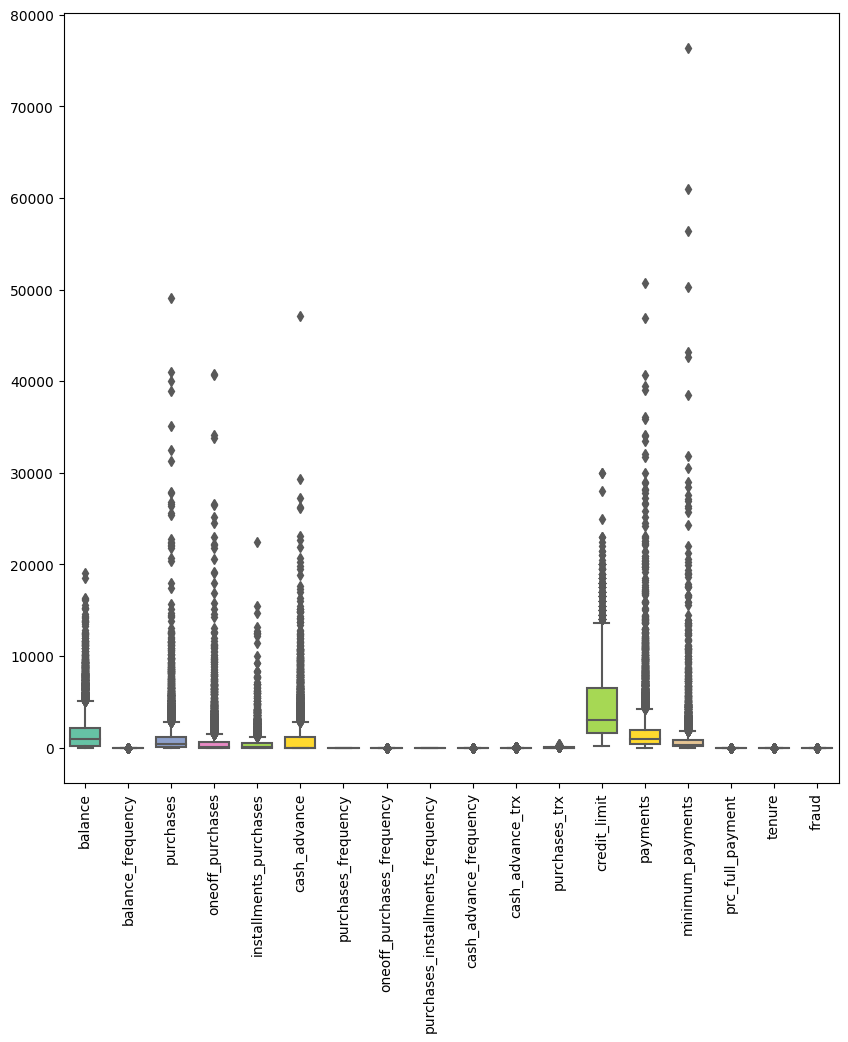

In [ ]:
# check for outliers in the dataset
plt.figure(figsize=(10, 10))
sns.boxplot(data= df, orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.xticks(rotation= 90)
plt.show()

The features such as Balance, Purchases, Oneoff-Purchases, Installments Purchases, Cash Advance, Credit Limi, Payments, Minimum Payments all have outliers. Since I do not have a lot of information for the reason of the outliers, I would not be removing them.

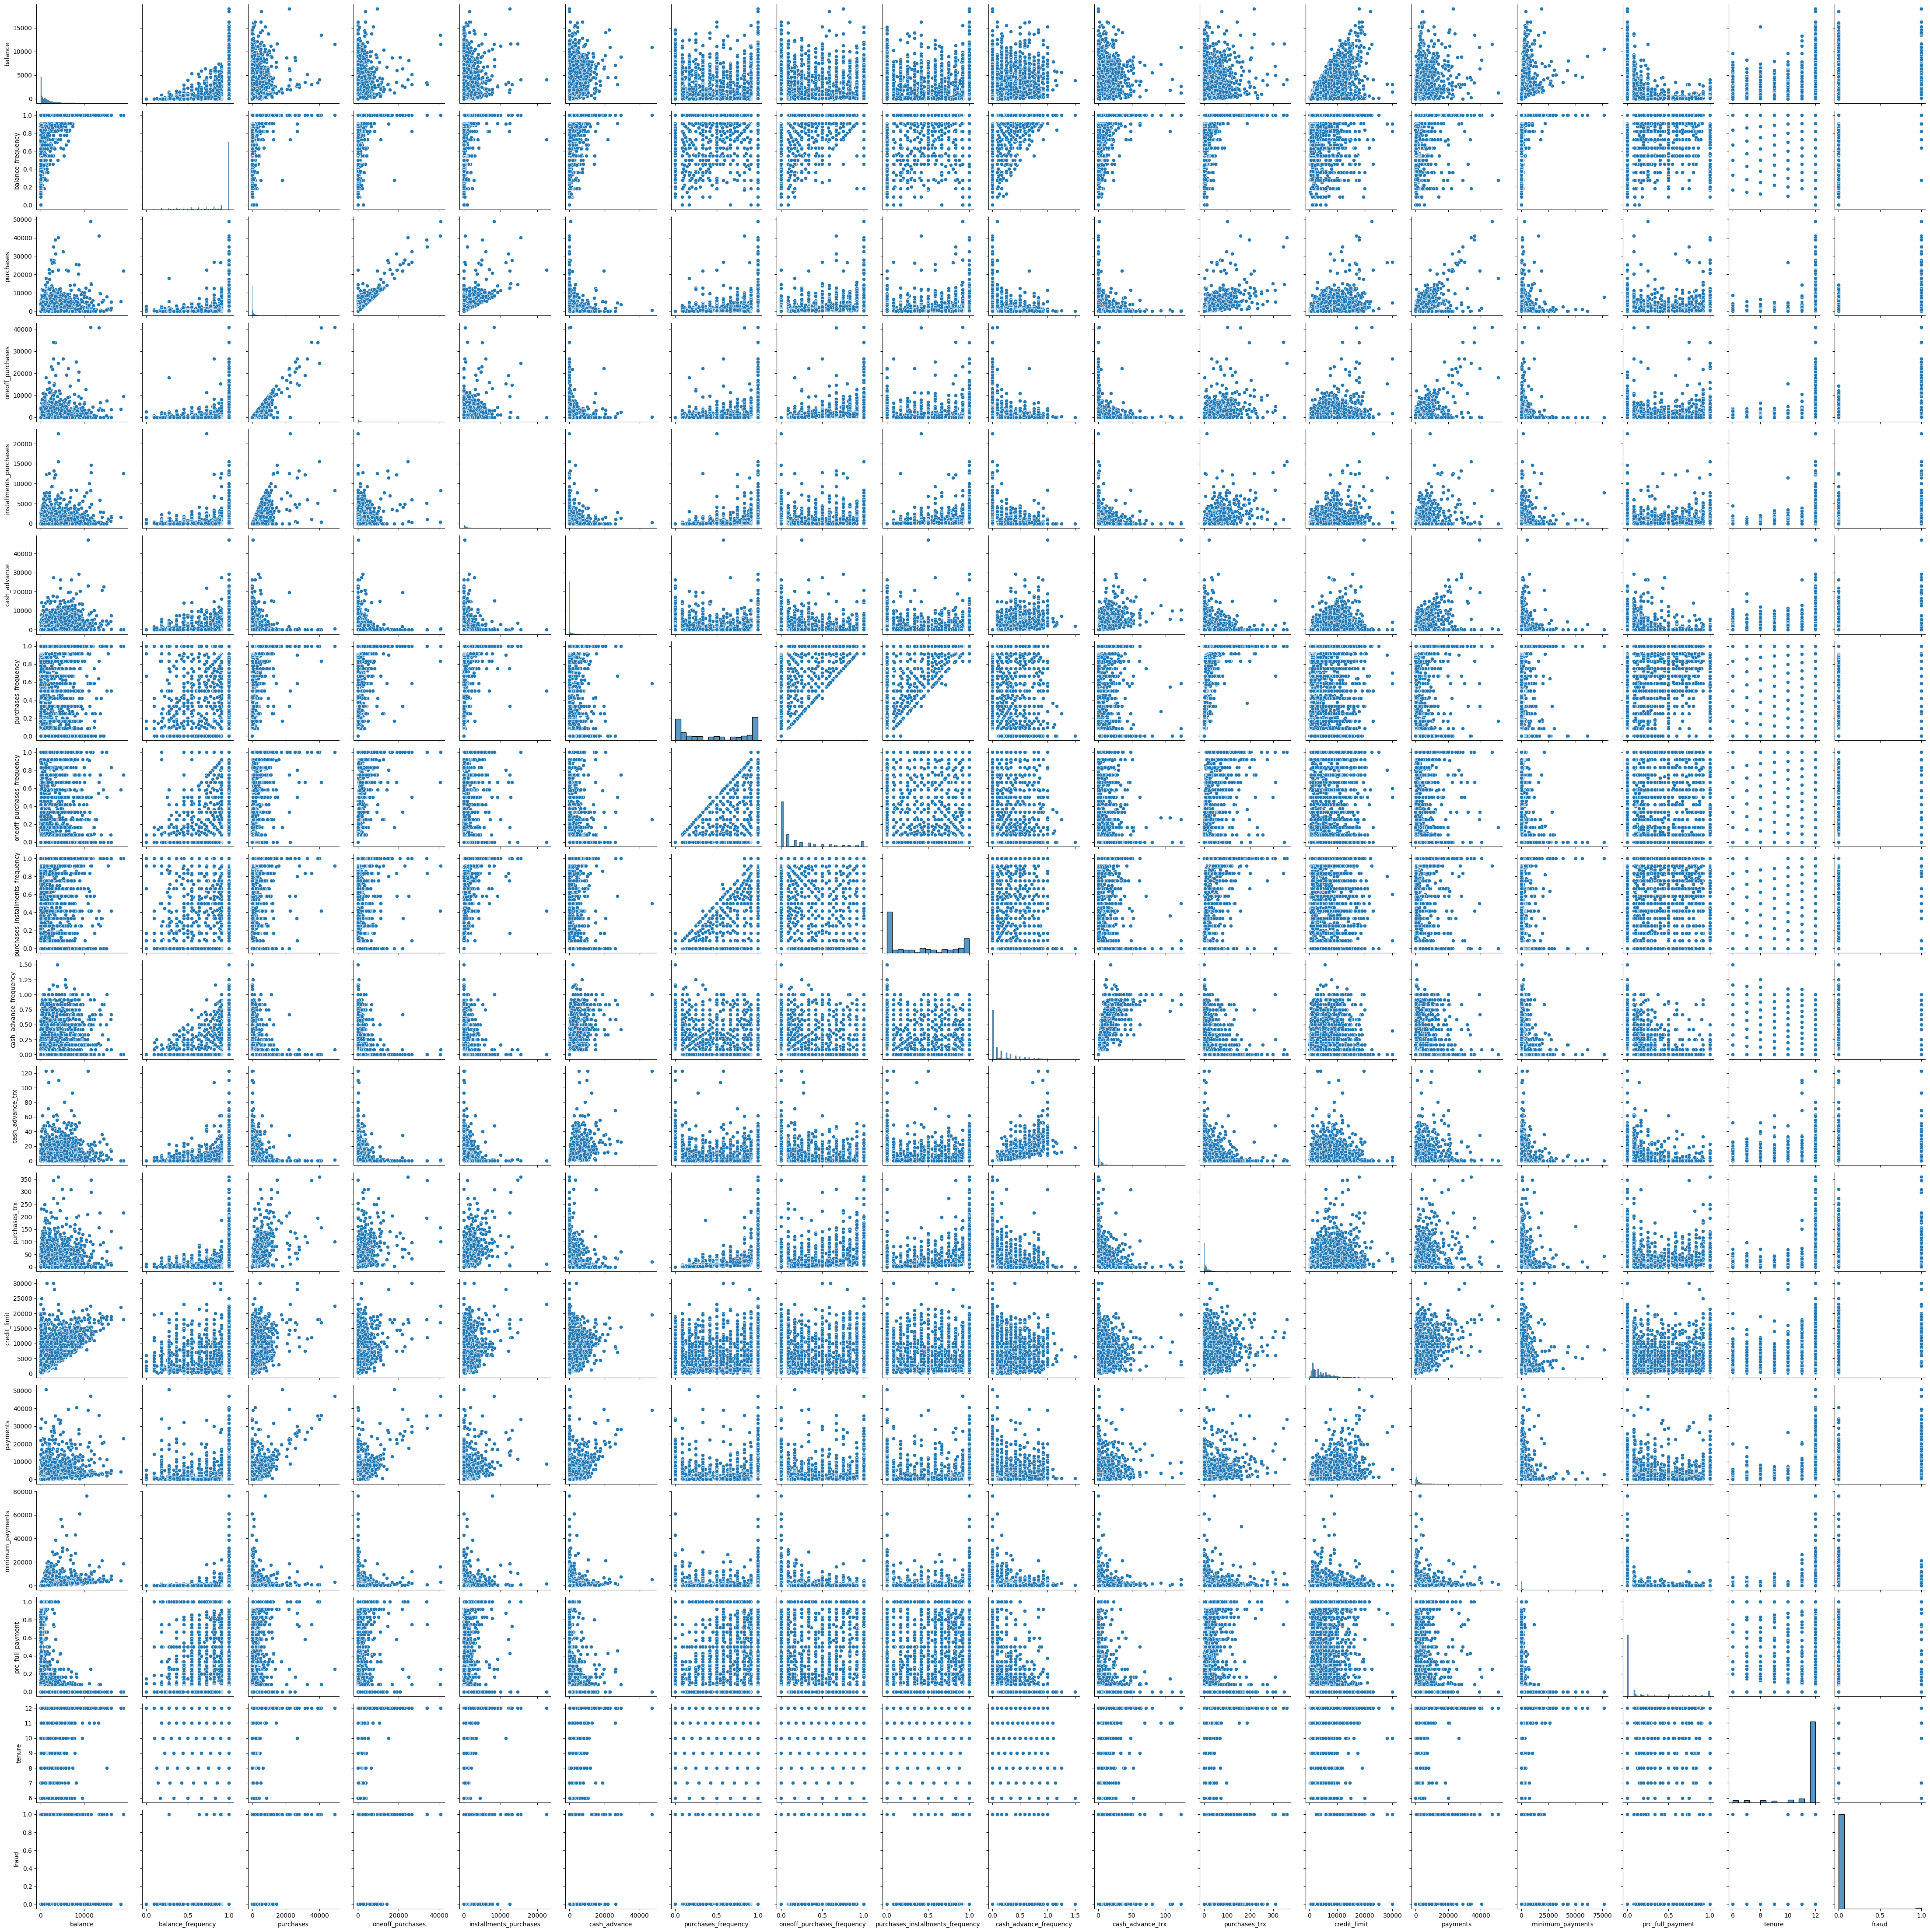

In [ ]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numeric_features)

Due to the large amount of columns in the dataset, I used pairplot to show the relationship between the columns but our major concern is the relationship between the columns and the tagert variable, which its visualization can be found at the bottom of the pairplot viz.

For the Balance column and Fraud, we see that Fraudalent activities have as much balance as that of non-fraudalent activities.

While, columns such as Purchases, One_off Purchases, Installmental Purchases and Cash advance, Fraudalents activities have more transactions than the non-fraudalent activities.

In the frequency columns such as, Purchase Frequency, Oneoff Purchase Frequency, Purchase Installements Frequency,  Non-fraudalent activities purchases are made more frequently than Fraudalent activities. The Cash Advance Frequency, the Fraudalent activities do not pay as frequently as Non-fraudalent activities.

In the Cash advance transaction, Purchase transactions Fraudalent activities have as many number of transactions as that of Non-fraudalent activities.

The Minimum Payments, Fraudalent activities have lower amounts, less than 25k compared to Non-Fraudalent activities.

In [ ]:
# class imbalance check
from collections import Counter

Counter(df['fraud'])

Counter({0: 8429, 1: 68})

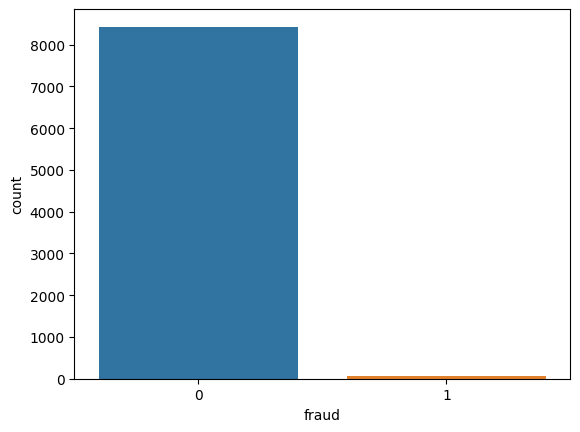

In [ ]:
sns.countplot(data=df, x=df['fraud'])
plt.show()

These shows that the target variable is extremely imbalance, which is acceptable since Fraudalent activities typically occurs in miniority.

In this project, what we want to identify are fraudulent activities, that is False Negatives (transactions are Fraud/positives which we test as negatives, rather than False Positives, transactions that are not frauds /negatives but are tested as positives).

Therefore our metric of choice is Recall.
Recall = TP/(TP+FN)

## Data PreProcessing & Modelling

In [ ]:
# check features that are correlated with the target variable
# using the previously created dataframe which contains all numeric features to display correlation
numeric_features.corr()

balance  balance_frequency  purchases  \
balance                           1.000000           0.309299   0.177503   
balance_frequency                 0.309299           1.000000   0.122036   
purchases                         0.177503           0.122036   1.000000   
oneoff_purchases                  0.160933           0.094977   0.917873   
installments_purchases            0.123734           0.114100   0.677157   
cash_advance                      0.495702           0.087997  -0.053441   
purchases_frequency              -0.090669           0.226194   0.392071   
oneoff_purchases_frequency        0.062765           0.186696   0.497010   
purchases_installments_frequency -0.070501           0.182258   0.314346   
cash_advance_frequency            0.444614           0.179632  -0.124756   
cash_advance_trx                  0.381535           0.132168  -0.069918   
purchases_trx                     0.149256           0.182292   0.687027   
credit_limit                      0.537329           0.086992   0.356671   
payments                          0.324592           0.037772   0.606163   
minimum_payments                  0.399833           0.132235   0.095223   
prc_full_payment                 -0.334227          -0.157169   0.174340   
tenure                            0.066743           0.104410   0.084227   
fraud                             0.208532           0.032574   0.525284   

                                  oneoff_purchases  installments_purchases  \
balance                                   0.160933                0.123734   
balance_frequency                         0.094977                0.114100   
purchases                                 0.917873                0.677157   
oneoff_purchases                          1.000000                0.329541   
installments_purchases                    0.329541                1.000000   
cash_advance                             -0.033123               -0.065830   
purchases_frequency                       0.264380                0.442524   
oneoff_purchases_frequency                0.523530                0.211588   
purchases_installments_frequency          0.126896                0.512528   
cash_advance_frequency                   -0.086484               -0.136525   
cash_advance_trx                         -0.048467               -0.076559   
purchases_trx                             0.546119                0.621907   
credit_limit                              0.320024                0.255081   
payments                                  0.571185                0.383012   
minimum_payments                          0.049860                0.133975   
prc_full_payment                          0.129373                0.174900   
tenure                                    0.062914                0.083717   
fraud                                     0.484372                0.351493   

                                  cash_advance  purchases_frequency  \
balance                               0.495702            -0.090669   
balance_frequency                     0.087997             0.226194   
purchases                            -0.053441             0.392071   
oneoff_purchases                     -0.033123             0.264380   
installments_purchases               -0.065830             0.442524   
cash_advance                          1.000000            -0.220137   
purchases_frequency                  -0.220137             1.000000   
oneoff_purchases_frequency           -0.091142             0.501343   
purchases_installments_frequency     -0.179343             0.862250   
cash_advance_frequency                0.629414            -0.318999   
cash_advance_trx                      0.655839            -0.209832   
purchases_trx                        -0.077701             0.566966   
credit_limit                          0.304631             0.118821   
payments                              0.459466             0.099615   
minimum_payments                      0.14

In [ ]:
# Split Data into Train and test
# Rescale features using Standard Scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = numeric_features.drop('fraud',axis=1).values
y = numeric_features['fraud'].values


scaler = StandardScaler()
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.shape

(5947, 17)

In [ ]:
y_train.shape

(5947,)

In [ ]:
# Since the data is highly imbalanced
# I would be using SMOTE Oversampling technique
# to resample the miniority class
# The focus of my resmapling would be applied on the train set only

from imblearn.over_sampling import SMOTE

X_train_scaled_resample, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)

# use counter to check the number of values in the target variable
Counter(y_train_resampled)

Counter({0: 5902, 1: 5902})

In [ ]:
# Model Selection
# For this project, I would be using Logistic Regression, Random Forest Classifier and XGBoost Classifier
# The data would bes tested on Cross Validation using Recall as metric and their performance would be based on their Mean and Standard deviation
# Which would be plotted on a box plot

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score,precision_score

lg = LogisticRegression()
rfc = RandomForestClassifier()
xgb_classifier = xgb.XGBClassifier()

models = [lg, rfc, xgb_classifier]
names = ['lg', 'rfc', 'xgb_classifier']
results = []
for name, model in zip(names, models):
  cv_results = cross_val_score(model, X_train_scaled_resample, y_train_resampled, cv=5, scoring='recall')
  results.append(cv_results)
  result = (name, cv_results.mean(), cv_results.std())
  print(result)


('lg', 0.8615689088534566, 0.009184801209500309)
('rfc', 0.9984747197864493, 0.0022357903100455306)
('xgb_classifier', 0.9993220338983051, 0.0009882969313297191)


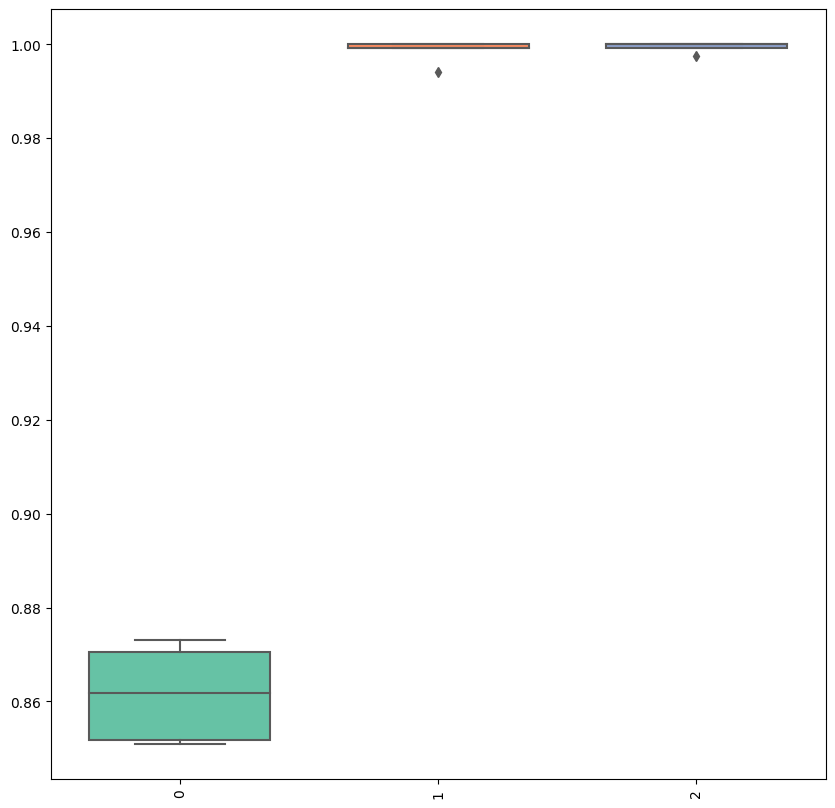

In [ ]:
# use boxplot to show the results
plt.figure(figsize=(10, 10))
sns.boxplot(data= results, orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.xticks(rotation= 90)
plt.show()

The Random Forest Classifier and XGBoost Classifier mean is very close with 0.001 difference between them.I would also use the ROC-AUC score and Precison Recall score to show which model is performing better.

In [ ]:


auc_lg=roc_auc_score(y_test, lg.predict_proba(X_test_scaled)[:,1])
auc_rfc=roc_auc_score(y_test, rfc.predict_proba(X_test_scaled)[:,1])
auc_xgb=roc_auc_score(y_test, xgb_classifier.predict_proba(X_test_scaled)[:,1])

print('Logisitic Regression roc_auc_score:', auc_lg)
print('Random Forest Classifier roc_auc_score:', auc_rfc)
print('XGBoost Classifier roc_auc_score:', auc_xgb)

Logisitic Regression roc_auc_score: 0.9355826637532045
Random Forest Classifier roc_auc_score: 0.9377763631045578
XGBoost Classifier roc_auc_score: 0.9329502245315806


In [ ]:

print('lg: recall_score %f precision_score %f' %(recall_score(y_test,lg.predict(X_test_scaled)),precision_score(y_test,lg.predict(X_test_scaled))))
print('rfc: recall_score %f precision_score %f' %(recall_score(y_test,rfc.predict(X_test_scaled)),precision_score(y_test,rfc.predict(X_test_scaled))))
print('xbg: recall_score %f precision_score %f' %(recall_score(y_test,xgb_classifier.predict(X_test_scaled)),precision_score(y_test,xgb_classifier.predict(X_test_scaled))))

lg: recall_score 0.826087 precision_score 0.130137
rfc: recall_score 0.521739 precision_score 0.800000
xbg: recall_score 0.565217 precision_score 0.684211


From the Recall Score, We see that the Logistic Regression is performing better than other two models.

## Fine Tune the Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params_lg = {'C': [0.001, 0.01, 0.1, 0.0,1.0, 10.0, 100.0]}
lg_grid = RandomizedSearchCV(lg,params_lg, cv=5, scoring='recall')
lg_grid.fit(X_train_scaled_resample, y_train_resampled)
best_params = lg_grid.best_params_
best_estimator = lg_grid.best_estimator_
score = lg_grid.best_score_
print(best_params)
print(best_estimator)
print(score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 35.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", 

{'C': 1.0}
LogisticRegression()
0.8615689088534566


In [ ]:
# generate classification report and confusion matrix for Logistic Regression
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
lg_tuned = LogisticRegression(**best_params)
lg_tuned.fit(X_train_scaled_resample, y_train_resampled)
lg_predict = lg_tuned.predict(X_test_scaled)


report =classification_report(y_test, lg_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2527
           1       0.13      0.83      0.22        23

    accuracy                           0.95      2550
   macro avg       0.56      0.89      0.60      2550
weighted avg       0.99      0.95      0.97      2550



[[2400  127]
 [   4   19]]


<Axes: >

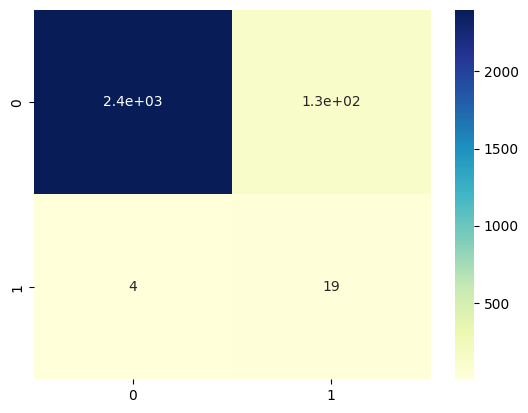

In [ ]:
confusion_lg=confusion_matrix(y_test,lg_predict)
print(confusion_lg)
sns.heatmap(confusion_lg,annot=True,cmap='YlGnBu')

From confusion matrix, we can see number of wrong case is 127 out of 2527, which is not surprising because of class imbalance. False negative is 4 out of 23, and classification power is 83%, from classification report.

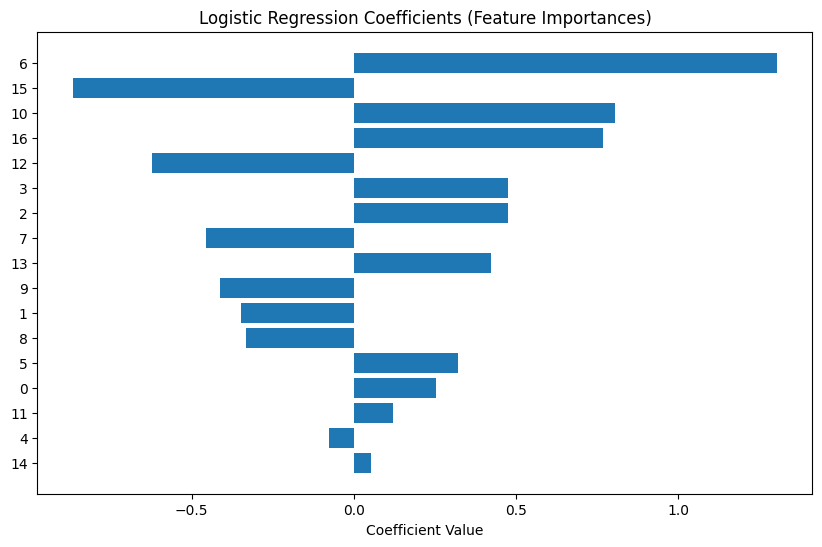

In [ ]:
# feature importance

coefficients = lg_tuned.coef_[0]
feature_names = np.arange(X_train_scaled_resample.shape[1])

# Sort the coefficients and feature names based on absolute values of coefficients
sorted_indices = np.argsort(np.abs(coefficients))
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients (Feature Importances)')
plt.show()

From the above visualization, Feature 6 is the most powerful variable for the predicting the class in which the transaction activity falls into.